In [101]:
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt

In [119]:
def get_deg_sum(G):
    nodes = list(G.nodes())
    tot = 0
    for node in nodes:
        tot += G.degree(node)
    return tot

# A
def gen_pref(T):
    G = nx.Graph()
    G.add_edge(0, 1)
    for newcomer in range(2, T, 1):
        G.add_node(newcomer)
        deg_sum = get_deg_sum(G)
        p = np.zeros(newcomer)
        for existing in range(newcomer):
            p[existing] = G.degree(existing) / deg_sum
        
        G.add_edge(newcomer, np.random.choice(list(range(newcomer)), p=p))

    degrees = [d for n, d in G.degree()]
    return G, degrees

In [120]:
with open("nx_caltech_2500.pkl", "rb") as webg:
    webgraph = pickle.load(webg)

In [121]:
queue = [list(webgraph.nodes)[0]]
visited = set()
while queue and len(visited) < 50:
    curr = queue.pop()
    if curr in visited:
        continue
    visited.add(curr)
    queue.extend(list(webgraph.neighbors(curr)))
Gweb = webgraph.subgraph(visited)

In [122]:
Gpref, _ = gen_pref(50)

# A

In [123]:
# compute degree centrality
degree_centrality_web = nx.degree_centrality(Gweb)
degree_centrality_pref = nx.degree_centrality(Gpref)
# compute betweenness centrality
betweenness_centrality_web = nx.betweenness_centrality(Gweb)
betweenness_centrality_pref = nx.betweenness_centrality(Gpref)
# compute closeness centrality
closeness_centrality_web = nx.closeness_centrality(Gweb)
closeness_centrality_pref = nx.closeness_centrality(Gpref)

In [124]:
def draw_graph(G, measure, title=""):
    pos = nx.spring_layout(G)
    x = [pos[node][0] for node in G.nodes()]
    y = [pos[node][1] for node in G.nodes()]


    # draw the graph with nodes sized and colored by the centrality measure
    sc = plt.scatter(x, y, s=10, c=measure, cmap='viridis', alpha=0.7)
    nx.draw_networkx_edges(G, pos, alpha=0.1)

    # add a colorbar
    cbar = plt.colorbar(sc)
    cbar.set_label(title)
    plt.title(title)

    # display the plot
    plt.show()

In [125]:
def intensity_graph(H, v, vmin=None, vmax=None, title=""):
  vmin = vmin if vmin else np.min(v)
  vmax = vmax if vmax else np.max(v)
  plt.figure()
  plt.title(title)
  nx.draw(
    H, 
    node_color=v, cmap=plt.cm.Blues, node_size=50, vmin=vmin, vmax=vmax,
    width=0.1, alpha=0.4, edge_color='grey'
  )
  plt.show()


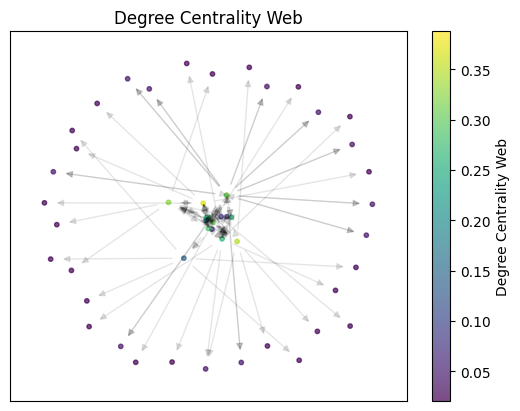

In [126]:
draw_graph(Gweb, list(degree_centrality_web.values()), title="Degree Centrality Web")

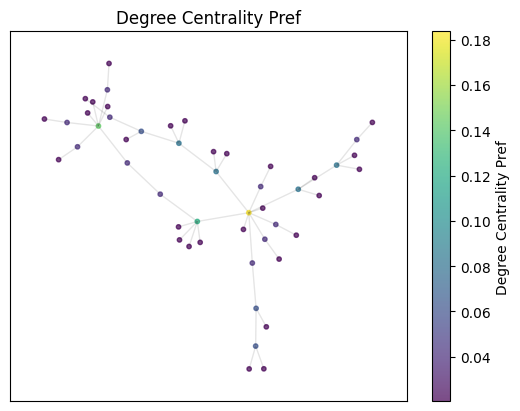

In [127]:
draw_graph(Gpref, list(degree_centrality_pref.values()), title="Degree Centrality Pref")

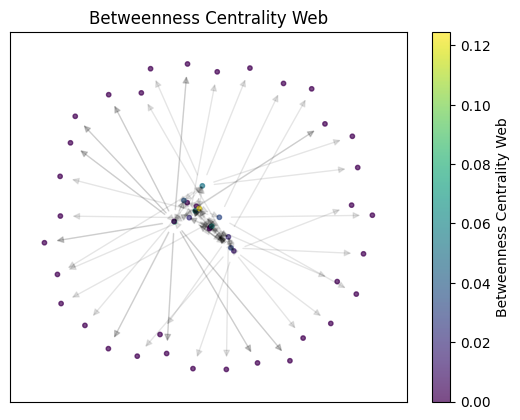

In [128]:
draw_graph(Gweb, list(betweenness_centrality_web.values()), title="Betweenness Centrality Web")

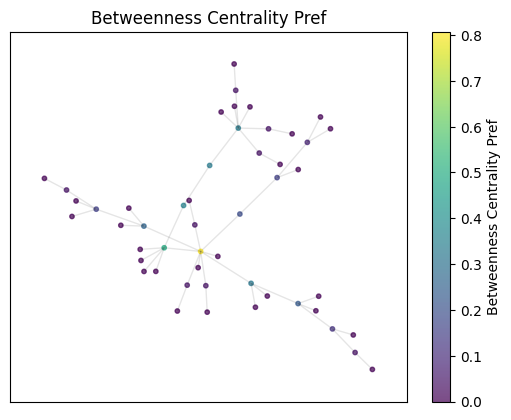

In [129]:
draw_graph(Gpref, list(betweenness_centrality_pref.values()), title="Betweenness Centrality Pref")

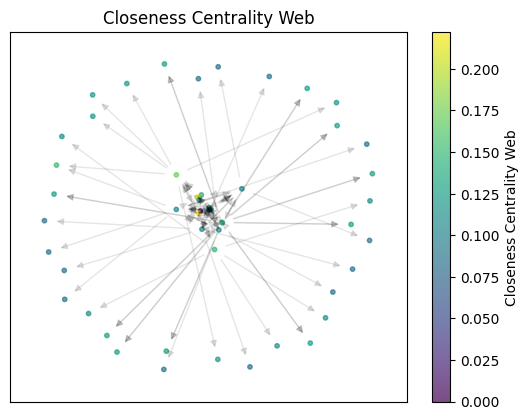

In [130]:
draw_graph(Gweb, list(closeness_centrality_web.values()), title="Closeness Centrality Web")

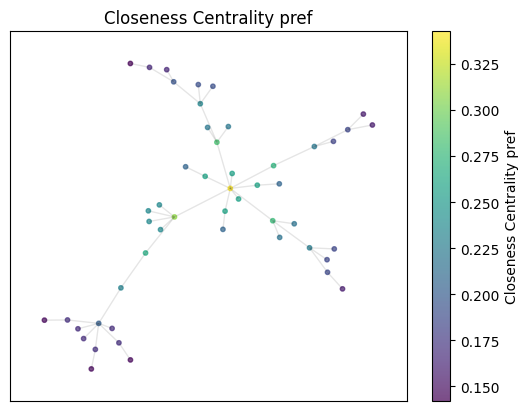

In [131]:
draw_graph(Gpref, list(closeness_centrality_pref.values()), title="Closeness Centrality pref")

For the preferential model, it seems like all the centrality measurements capture 1 very central node with some nodes that are a bit less central scattered throughout. The closeness centrality measure has more variance in the measure among the nodes for the preferential model. 

For the web model, it seems like degree and betweenness capture some of the central nodes in the middle of the graph, while for closeness it doesn't quite get that same sense of centrality of the other 2. 